In [3]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True) 

# Data is read in dataframe

In [5]:
df_sales1=pd.read_csv("C:/Users/Acer/Desktop/school/DS/EDA_assignment/sales_data_sample.csv", encoding = 'unicode_escape')
df_sales1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Find the shape and Describe data

In [3]:
df_sales1.shape

(2823, 25)

In [4]:
df_sales1.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


1. max and 75% of 'PRICEEACH'is same as 100
2. There are outliers in Sales columns due to the deal size

# Find the number of columns

In [5]:
for col in df_sales1.columns:
    print (col)

ORDERNUMBER
QUANTITYORDERED
PRICEEACH
ORDERLINENUMBER
SALES
ORDERDATE
STATUS
QTR_ID
MONTH_ID
YEAR_ID
PRODUCTLINE
MSRP
PRODUCTCODE
CUSTOMERNAME
PHONE
ADDRESSLINE1
ADDRESSLINE2
CITY
STATE
POSTALCODE
COUNTRY
TERRITORY
CONTACTLASTNAME
CONTACTFIRSTNAME
DEALSIZE


In [78]:
#Find null values if any for each column
df_sales1.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [79]:
# Addressline2 column is deleted due to no use in sales forcasting
df_sales1.drop('ADDRESSLINE2',axis='columns', inplace=True)

In [80]:
df_sales1.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [9]:
# Find unique values of state and Territory column

col_state=df_sales1['STATE'].unique()
print('Unique values of States are:', col_state)

col_TERR=df_sales1['TERRITORY'].unique()
print('Unique values of TERRITORY are:', col_TERR)

Unique values of States are: ['NY' nan 'CA' 'Victoria' 'NJ' 'CT' 'MA' 'PA' 'NSW' 'Queensland' 'BC'
 'Tokyo' 'NH' 'Quebec' 'Osaka' 'Isle of Wight' 'NV']
Unique values of TERRITORY are: [nan 'EMEA' 'APAC' 'Japan']


# In subsequent lines, the NAN values of state is filled with corresponding Territory value and vice versa

In [14]:
df_sales1.loc[0:,['STATE','TERRITORY']]


,STATE,TERRITORY
0,NY,NaN
1,NaN,EMEA
2,NaN,EMEA
3,CA,NaN
4,CA,NaN
...,...,...
2818,NaN,EMEA
2819,NaN,EMEA
2820,NaN,EMEA
2821,NaN,EMEA


In [13]:
df_sales1['STATE'].fillna(value = df_sales1['TERRITORY'],inplace=True)
print(df_sales1)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [14]:
col_TERR2=df_sales1['STATE'].unique()
print('Unique values of STATE are:', col_TERR2)

Unique values of STATE are: ['NY' 'EMEA' 'CA' 'Victoria' 'NJ' 'CT' 'MA' 'PA' 'NSW' 'Japan'
 'Queensland' 'BC' 'Tokyo' 'NH' 'Quebec' 'Osaka' 'Isle of Wight' 'APAC'
 'NV']


In [15]:
col_TERR1=df_sales1['TERRITORY'].unique()
print('Unique values of TERRITORY are:', col_TERR1)

Unique values of TERRITORY are: [nan 'EMEA' 'APAC' 'Japan']


In [17]:
df_sales1['TERRITORY'].fillna(value = df_sales1['STATE'],inplace=True)
print(df_sales1)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [18]:
col_TERR1=df_sales1['TERRITORY'].unique()
print('Unique values of TERRITORY are:', col_TERR1)

Unique values of TERRITORY are: ['NY' 'EMEA' 'CA' 'APAC' 'NJ' 'CT' 'MA' 'PA' 'Japan' 'BC' 'NH' 'Quebec'
 'NV']


# Few other columns are drop as no use in sales forcast

In [18]:
df_sales1.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
CITY                 0
STATE                0
POSTALCODE          76
COUNTRY              0
TERRITORY            0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [19]:
df_sales1.drop('POSTALCODE',axis='columns', inplace=True)

In [20]:
df_sales1.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [21]:
df_sales1.drop(['ORDERDATE','CUSTOMERNAME','PHONE','ADDRESSLINE1','CONTACTLASTNAME','CONTACTFIRSTNAME'],axis='columns', inplace=True)

In [22]:
df_sales1.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
CITY               0
STATE              0
COUNTRY            0
TERRITORY          0
DEALSIZE           0
dtype: int64

Find the data type of each columns

In [23]:
df_sales1.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
CITY                object
STATE               object
COUNTRY             object
TERRITORY           object
DEALSIZE            object
dtype: object

In [24]:
duplicate_rows_df = df_sales1[df_sales1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


<AxesSubplot:xlabel='SALES'>

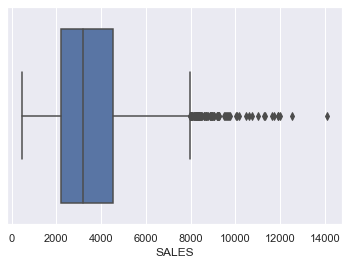

In [25]:
sns.boxplot(x=df_sales1['SALES'])


In [29]:
df_sales1['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the proportion of each deal size value')

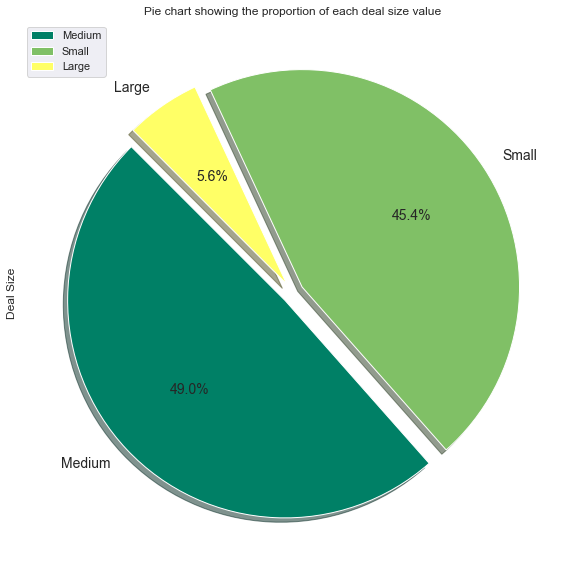

In [35]:
df_sales1['DEALSIZE'].value_counts().plot(kind='pie', explode=[0.05,0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('Deal Size')
plt.title('Pie chart showing the proportion of each deal size value')

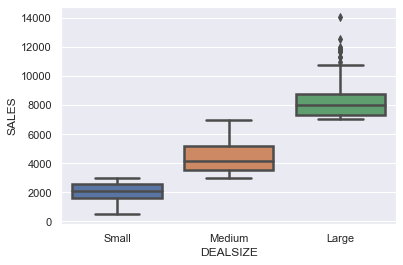

In [36]:
ax = sns.boxplot(x='DEALSIZE', y='SALES', data=df_sales1,linewidth=2.5)

In [38]:
df_sales1.groupby(['DEALSIZE','PRODUCTLINE'])['SALES'].mean()

DEALSIZE  PRODUCTLINE     
Large     Classic Cars        8212.801959
          Motorcycles         8376.032105
          Planes              8003.522222
          Trains              8977.050000
          Trucks and Buses    8036.580000
          Vintage Cars        8711.168750
Medium    Classic Cars        4585.393189
          Motorcycles         4361.344167
          Planes              4175.240698
          Ships               3950.795047
          Trains              4342.130769
          Trucks and Buses    4668.729600
          Vintage Cars        4159.156935
Small     Classic Cars        2037.398471
          Motorcycles         2095.346410
          Planes              2168.844167
          Ships               2296.866614
          Trains              2087.420400
          Trucks and Buses    2138.706723
          Vintage Cars        1889.884565
Name: SALES, dtype: float64

In [ ]:
# BOX plot of sales showing some outliers due Large deal size
# Large deal size having small numbers but have sales much higher than medium and small deal size
# Also large deal size is having some outliers too
# so the sales is showing outliers

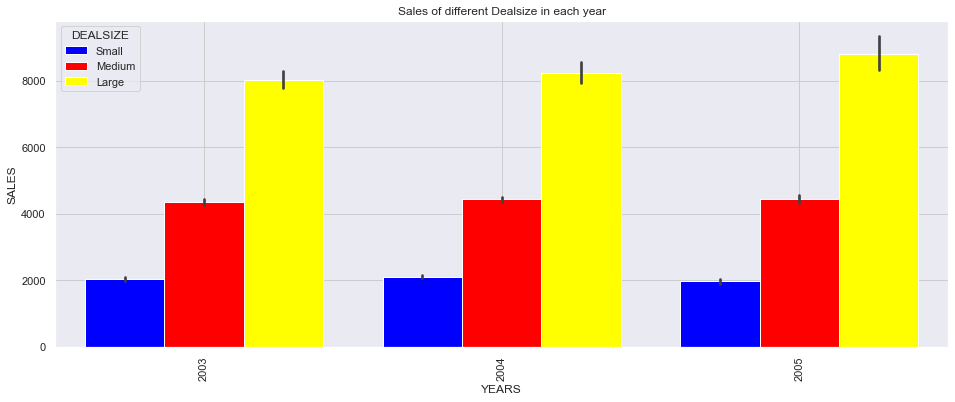

In [39]:
sns.set()
plt.figure(figsize=(16,6))

# This is where the actual plot gets made
ax = sns.barplot(data=df_sales1, x='YEAR_ID', y='SALES', hue='DEALSIZE', palette=['blue', 'red', 'yellow'], saturation=4.0)

# Customise some display properties
ax.set_title('Sales of different Dealsize in each year')
ax.grid(color='#cccccc')
ax.set_ylabel('SALES')
ax.set_xlabel('YEARS')
ax.set_xticklabels(df_sales1['YEAR_ID'].unique().astype(str), rotation='vertical')
# Ask Matplotlib to show it
plt.show()

In [ ]:
#Deal size of small and medium become constant in 3 consecutive year, but large deal sixe get increased quite high

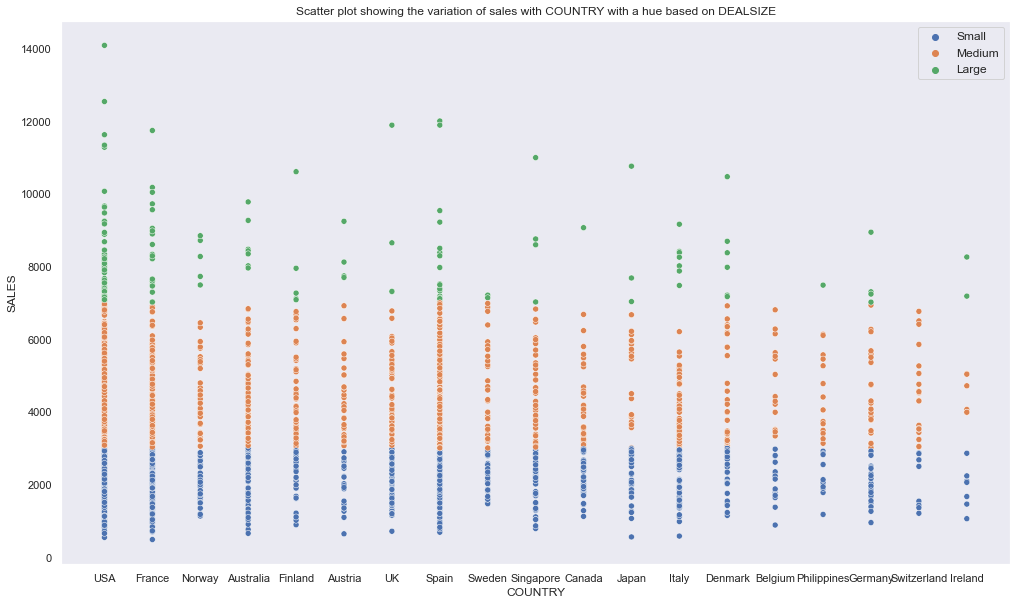

In [40]:
plt.figure(figsize=(17,10))
sns.scatterplot(data=df_sales1, x='COUNTRY', y='SALES', hue='DEALSIZE')

plt.xlabel('COUNTRY')
plt.ylabel('SALES')
plt.title('Scatter plot showing the variation of sales with COUNTRY with a hue based on DEALSIZE')
plt.grid(False)
plt.legend(fontsize=12)

In [ ]:
# In the above plot wecan interprete that deal size in USA and France is quite high tahn the other countries
# Cananda, Sweden, Finland,UK,Japan,Ireland and Philippines has very low Large deal size and Belgium has no large dealsize yet
#Ireland has very low overall sale

<AxesSubplot:xlabel='PRICEEACH'>

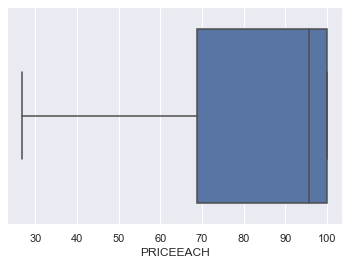

In [26]:
sns.boxplot(x=df_sales1['PRICEEACH'])

In [54]:
df_sales1['PRICEEACH'].describe()


count    2823.000000
mean       83.658544
std        20.174277
min        26.880000
25%        68.860000
50%        95.700000
75%       100.000000
max       100.000000
Name: PRICEEACH, dtype: float64

In [ ]:
# max and 75% value are same so in PriceEach boxplot, no upperwhisker
# Difference between minimum and maximum value is quite high
# Different countrieshas different value of same product

In [27]:
df_sales1['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

# Bar chart showing sales accross different product

Text(0.5, 1.0, 'Bar Chart showing the sales in each productline')

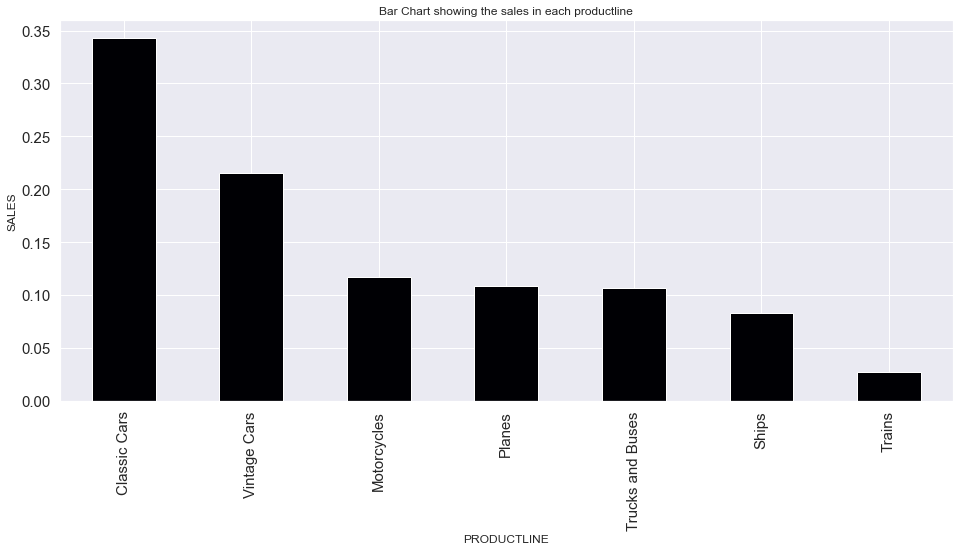

In [28]:
(df_sales1['PRODUCTLINE'].value_counts() / len(df_sales1)).plot(kind='bar', figsize=(16,7), colormap='magma', fontsize=15)

plt.xlabel('PRODUCTLINE')
plt.ylabel('SALES')
plt.title('Bar Chart showing the sales in each productline')

In [ ]:
#Sales of Classic cars are maximum and Trains are minimum
#Sale of Vintage Cars are high but much lower than classic cars.
# Motor cycles, Planes, Trucks and buses sales are almost same
# ships sales are lower

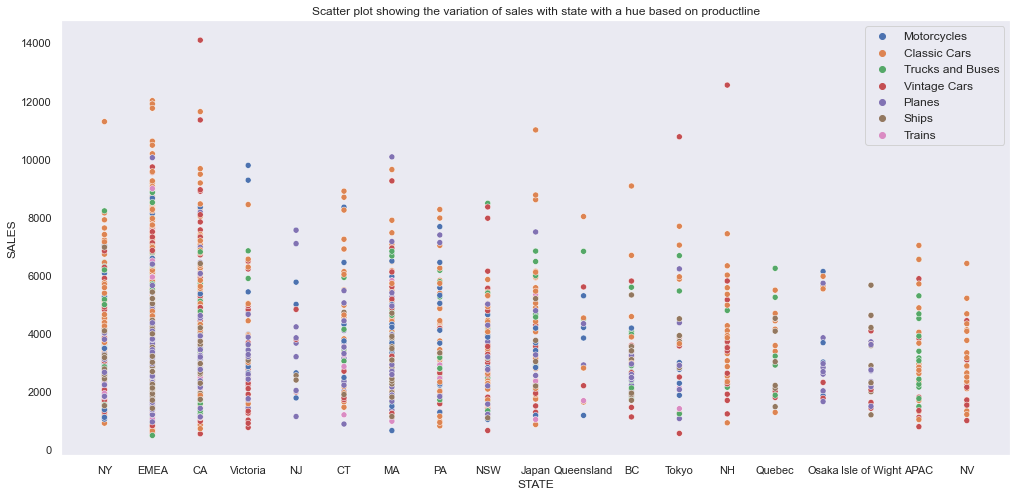

In [29]:
plt.figure(figsize=(17,8))
sns.scatterplot(data=df_sales1, x='STATE', y='SALES', hue='PRODUCTLINE')

plt.xlabel('STATE')
plt.ylabel('SALES')
plt.title('Scatter plot showing the variation of sales with state with a hue based on productline')
plt.grid(False)
plt.legend(fontsize=12)

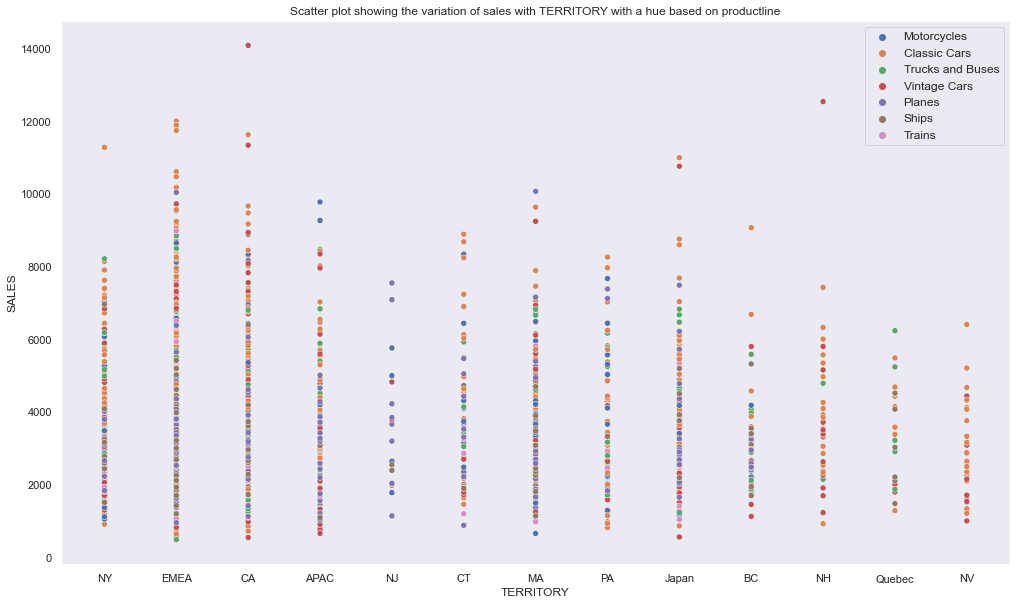

In [30]:
plt.figure(figsize=(17,10))
sns.scatterplot(data=df_sales1, x='TERRITORY', y='SALES', hue='PRODUCTLINE')

plt.xlabel('TERRITORY')
plt.ylabel('SALES')
plt.title('Scatter plot showing the variation of sales with TERRITORY with a hue based on productline')
plt.grid(False)
plt.legend(fontsize=12)

In [62]:
sy=df_sales1.groupby(['YEAR_ID'])['SALES'].mean()
print(sy)

YEAR_ID
2003    3516.979540
2004    3512.388550
2005    3747.880146
Name: SALES, dtype: float64


Text(0.5, 1.0, 'Bar Chart showing the mean value of SALES in respect to year')

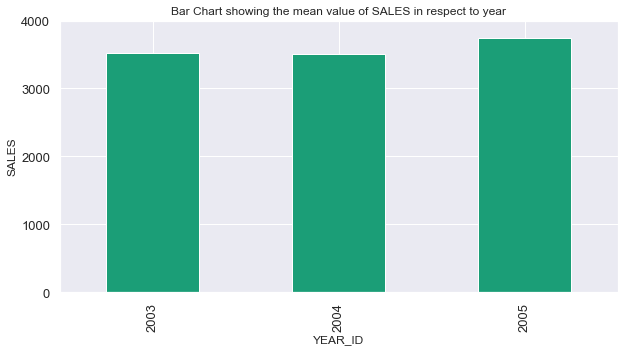

In [33]:
df_sales1.groupby(['YEAR_ID'])['SALES'].mean().plot.bar(figsize=(10,5), colormap='Dark2', fontsize=13, yticks=np.arange(0, 5000, 1000))
plt.xlabel('YEAR_ID')
plt.ylabel('SALES')
plt.title('Bar Chart showing the mean value of SALES in respect to year')

In [34]:
GB.groupby(['YEAR_ID'])['SALES'].mean()
print(GB)

                ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
YEAR_ID QTR_ID                                                             
2003    1           1313831             4561   10731.53              904   
        2           1639944             5659   13557.61             1050   
        3           1866511             6209   15544.00             1215   
        4           5337813            18183   43960.00             3540   
2004    1           2381155             8284   19486.11             1525   
        2           2285726             7666   18559.00             1249   
        3           3279997            10909   26813.76             2142   
        4           5887886            19965   47629.23             3774   
2005    1           3134818            10640   25229.24             1871   
        2           1832700             6991   14657.59              984   

                     SALES  MONTH_ID   MSRP  
YEAR_ID QTR_ID                           

In [35]:
GB=df_sales1.groupby([(df_sales1.YEAR_ID),(df_sales1.QTR_ID)]).sum()
print (GB)

                ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
YEAR_ID QTR_ID                                                             
2003    1           1313831             4561   10731.53              904   
        2           1639944             5659   13557.61             1050   
        3           1866511             6209   15544.00             1215   
        4           5337813            18183   43960.00             3540   
2004    1           2381155             8284   19486.11             1525   
        2           2285726             7666   18559.00             1249   
        3           3279997            10909   26813.76             2142   
        4           5887886            19965   47629.23             3774   
2005    1           3134818            10640   25229.24             1871   
        2           1832700             6991   14657.59              984   

                     SALES  MONTH_ID   MSRP  
YEAR_ID QTR_ID                           

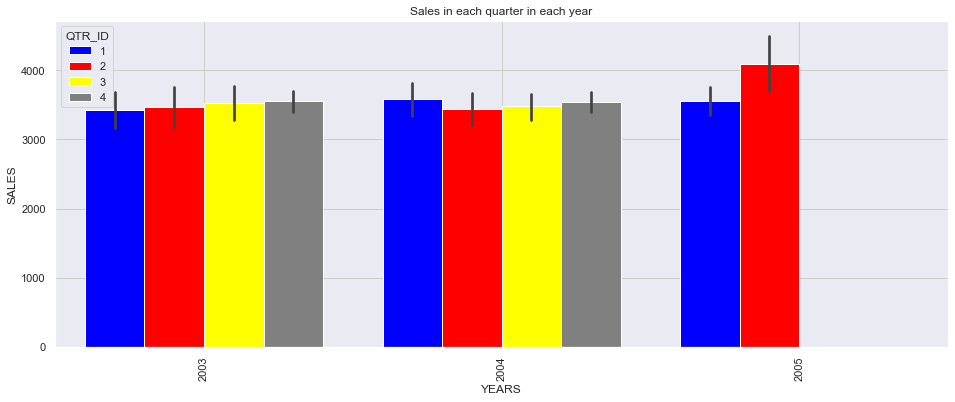

In [63]:
sns.set()
plt.figure(figsize=(16,6))

# This is where the actual plot gets made
ax = sns.barplot(data=df_sales1, x='YEAR_ID', y='SALES', hue='QTR_ID', palette=['blue', 'red', 'yellow', 'grey','green','violet','orange'], saturation=4.0)

# Customise some display properties
ax.set_title('Sales in each quarter in each year')
ax.grid(color='#cccccc')
ax.set_ylabel('SALES')
ax.set_xlabel('YEARS')
ax.set_xticklabels(df_sales1['YEAR_ID'].unique().astype(str), rotation='vertical')
# Ask Matplotlib to show it
plt.show()

In [39]:
df_sales1['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [75]:

PV=df_sales1.pivot_table(index='YEAR_ID',columns='PRODUCTLINE',values='SALES')
print(PV)

PRODUCTLINE  Classic Cars  Motorcycles       Planes        Ships       Trains  \
YEAR_ID                                                                         
2003          4056.790410  3402.711743  3203.030588  3022.482593  2600.081786   
2004          3987.006991  3417.958720  3122.185093  2969.025826  3149.293243   
2005          4230.020629  4050.819483  3334.569500  3373.107105  3076.444167   

PRODUCTLINE  Trucks and Buses  Vintage Cars  
YEAR_ID                                      
2003              3822.090273   2945.645973  
2004              3727.485141   3209.238627  
2005              3633.816735   3340.581471  


In [12]:
df_sales1.groupby(['YEAR_ID','PRODUCTLINE'])['SALES'].mean()

YEAR_ID  PRODUCTLINE     
2003     Classic Cars        4056.790410
         Motorcycles         3402.711743
         Planes              3203.030588
         Ships               3022.482593
         Trains              2600.081786
         Trucks and Buses    3822.090273
         Vintage Cars        2945.645973
2004     Classic Cars        3987.006991
         Motorcycles         3417.958720
         Planes              3122.185093
         Ships               2969.025826
         Trains              3149.293243
         Trucks and Buses    3727.485141
         Vintage Cars        3209.238627
2005     Classic Cars        4230.020629
         Motorcycles         4050.819483
         Planes              3334.569500
         Ships               3373.107105
         Trains              3076.444167
         Trucks and Buses    3633.816735
         Vintage Cars        3340.581471
Name: SALES, dtype: float64

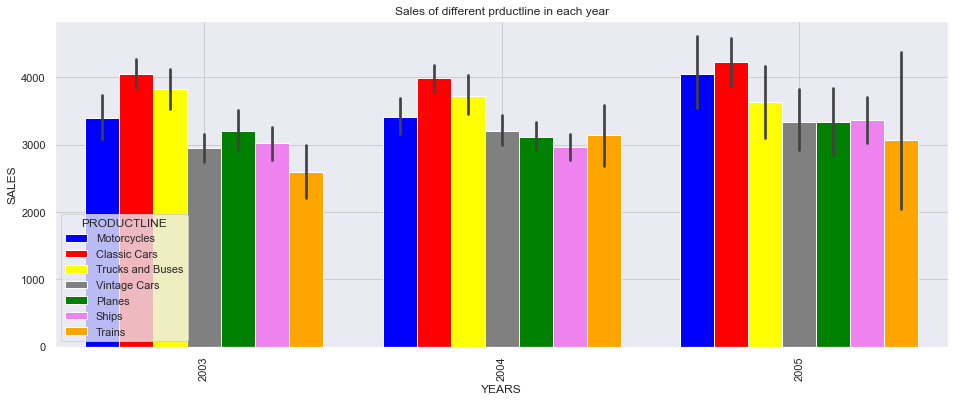

In [10]:
sns.set()
plt.figure(figsize=(16,6))

# This is where the actual plot gets made
ax = sns.barplot(data=df_sales1, x='YEAR_ID', y='SALES', hue='PRODUCTLINE', palette=['blue', 'red', 'yellow', 'grey','green','violet','orange'], saturation=4.0)

# Customise some display properties
ax.set_title('Sales of different prductline in each year')
ax.grid(color='#cccccc')
ax.set_ylabel('SALES')
ax.set_xlabel('YEARS')
ax.set_xticklabels(df_sales1['YEAR_ID'].unique().astype(str), rotation='vertical')
# Ask Matplotlib to show it
plt.show()